In [5]:
# this needs to be run for each new runtime
# because colab has scikit-learn 1.0.2 pre-installed 
# and we need newer version (1.2.0 and higher)
# to use .set_output() method
!pip install scikit-learn --upgrade

# if you plan on running the whole notebook again during the same runtime
# you can comment the line above

# Housing classification: Decision Trees

**Dataset variables:**

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

TotalBsmtSF: Total square feet of basement area

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

GarageCars: Size of garage in car capacity

WoodDeckSF: Wood deck area in square feet

ScreenPorch: Screen porch area in square feet

## 1. Read the data

In [11]:
import pandas as pd
url = "https://drive.google.com/file/d/1SxHrO6j5552c7uVUWKqqFKaSSkx06Gh8/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]


house = pd.read_csv(path)
house.columns
X=house

## 2. Define X and y

In [12]:
y = house.pop("Expensive")

## 3. Data Splitting (Train - Test)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

## 4. Implement a Decision Tree

A Decision Tree is one of the simplest Machine Learning models. To implement it, we need to first:

- Import it from the appropriate submodule of Scikit-Learn.
- Initialize it.
- Fit it.

In [10]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X=X_train, y=y_train)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**We got an error**: the model cannot deal with NAN values.

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 772 to 1391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1168 non-null   int64  
 1   LotFrontage   966 non-null    float64
 2   TotalBsmtSF   1168 non-null   int64  
 3   BedroomAbvGr  1168 non-null   int64  
 4   Fireplaces    1168 non-null   int64  
 5   PoolArea      1168 non-null   int64  
 6   GarageCars    1168 non-null   int64  
 7   WoodDeckSF    1168 non-null   int64  
 8   ScreenPorch   1168 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 91.2 KB


## 6. Dealing with missing data

We will use the `SimpleImputer()` with its default values. It will replace any missing value with the mean of the column it belongs to.

**Another error**: the model cannot deal with missing data. Let's fix it.

Simple imputer allows these strategies:
- mean (default),
- median,
- most frequent,
- constant.

For more details, look here: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [16]:
from sklearn.impute import SimpleImputer

Follow this approach for different types of estimators:
1. initialize,
2. use fit on the **train** set,
3. use transform on the **train** set,
4. use transform on the **test** set.

It is possible to combine steps 2 and 3 and use fit_transform instead.

In [17]:
# 1. initialize
my_imputer = SimpleImputer().set_output(transform='pandas')

In [18]:
# 2. use fit on the train set
my_imputer.fit(X_train)

SimpleImputer()

In [19]:
# 3. use transform on the train set
X_imputed_train = my_imputer.transform(X_train)

In [20]:
X_imputed_train.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

NO DATA SNOOPING!

We will implement the 4th step in 7.1.

### 6.1. Implement a Decision Tree (numerical features + missing values imputed)

In [21]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X = X_imputed_train, 
            y = y_train)

DecisionTreeClassifier()

### 6.2. Make predictions and check accuracy on the train set

In [22]:
# make predictions
y_pred_tree_train = my_tree.predict(X_imputed_train)

In [23]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )

1.0

The model seems to work REALLY well. Suspiciously well, even. Remember that the model has been trained using the train set and we have now checked its accuracy on the very same train set. The real evaluation will come from the test set.

## 7. Check accuracy for the test set

Is the model able to generalize? Is it able to make predictions on data it has not "seen" before?

### 7.1. Transform the test set

The test set already contains only numerical features, but we still need to impute the missing values with the "imputer" we already created and fitted on the train set.

Remember: transformers only have to be fitted to the train set. Then, they are used to transform both the train and the test set.

In [25]:
# impute NaN's to test set
X_imputed_test = my_imputer.transform(X_test)

### 7.2. Make predictions on the test set

In [26]:
y_pred_tree_test = my_tree.predict(X_imputed_test)

### 7.3. Check accuracy score on the test set

In [27]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.8767123287671232

This accuracy is even lower than some of our intuition-based models...

Our model has a **very high variance**: the difference between train and test set is huge. We can also say that our model suffers from **overfitting**: it has captured patterns in the training set that were not present in the testing set (they were mere "noise").

We will need to improve the model.

## 8. Plotting the Decision Tree

A Decision Tree is a succession of rules that split the dataset based on the variables that better predict the target. This tree, with its rules, can be visualized in a diagram:

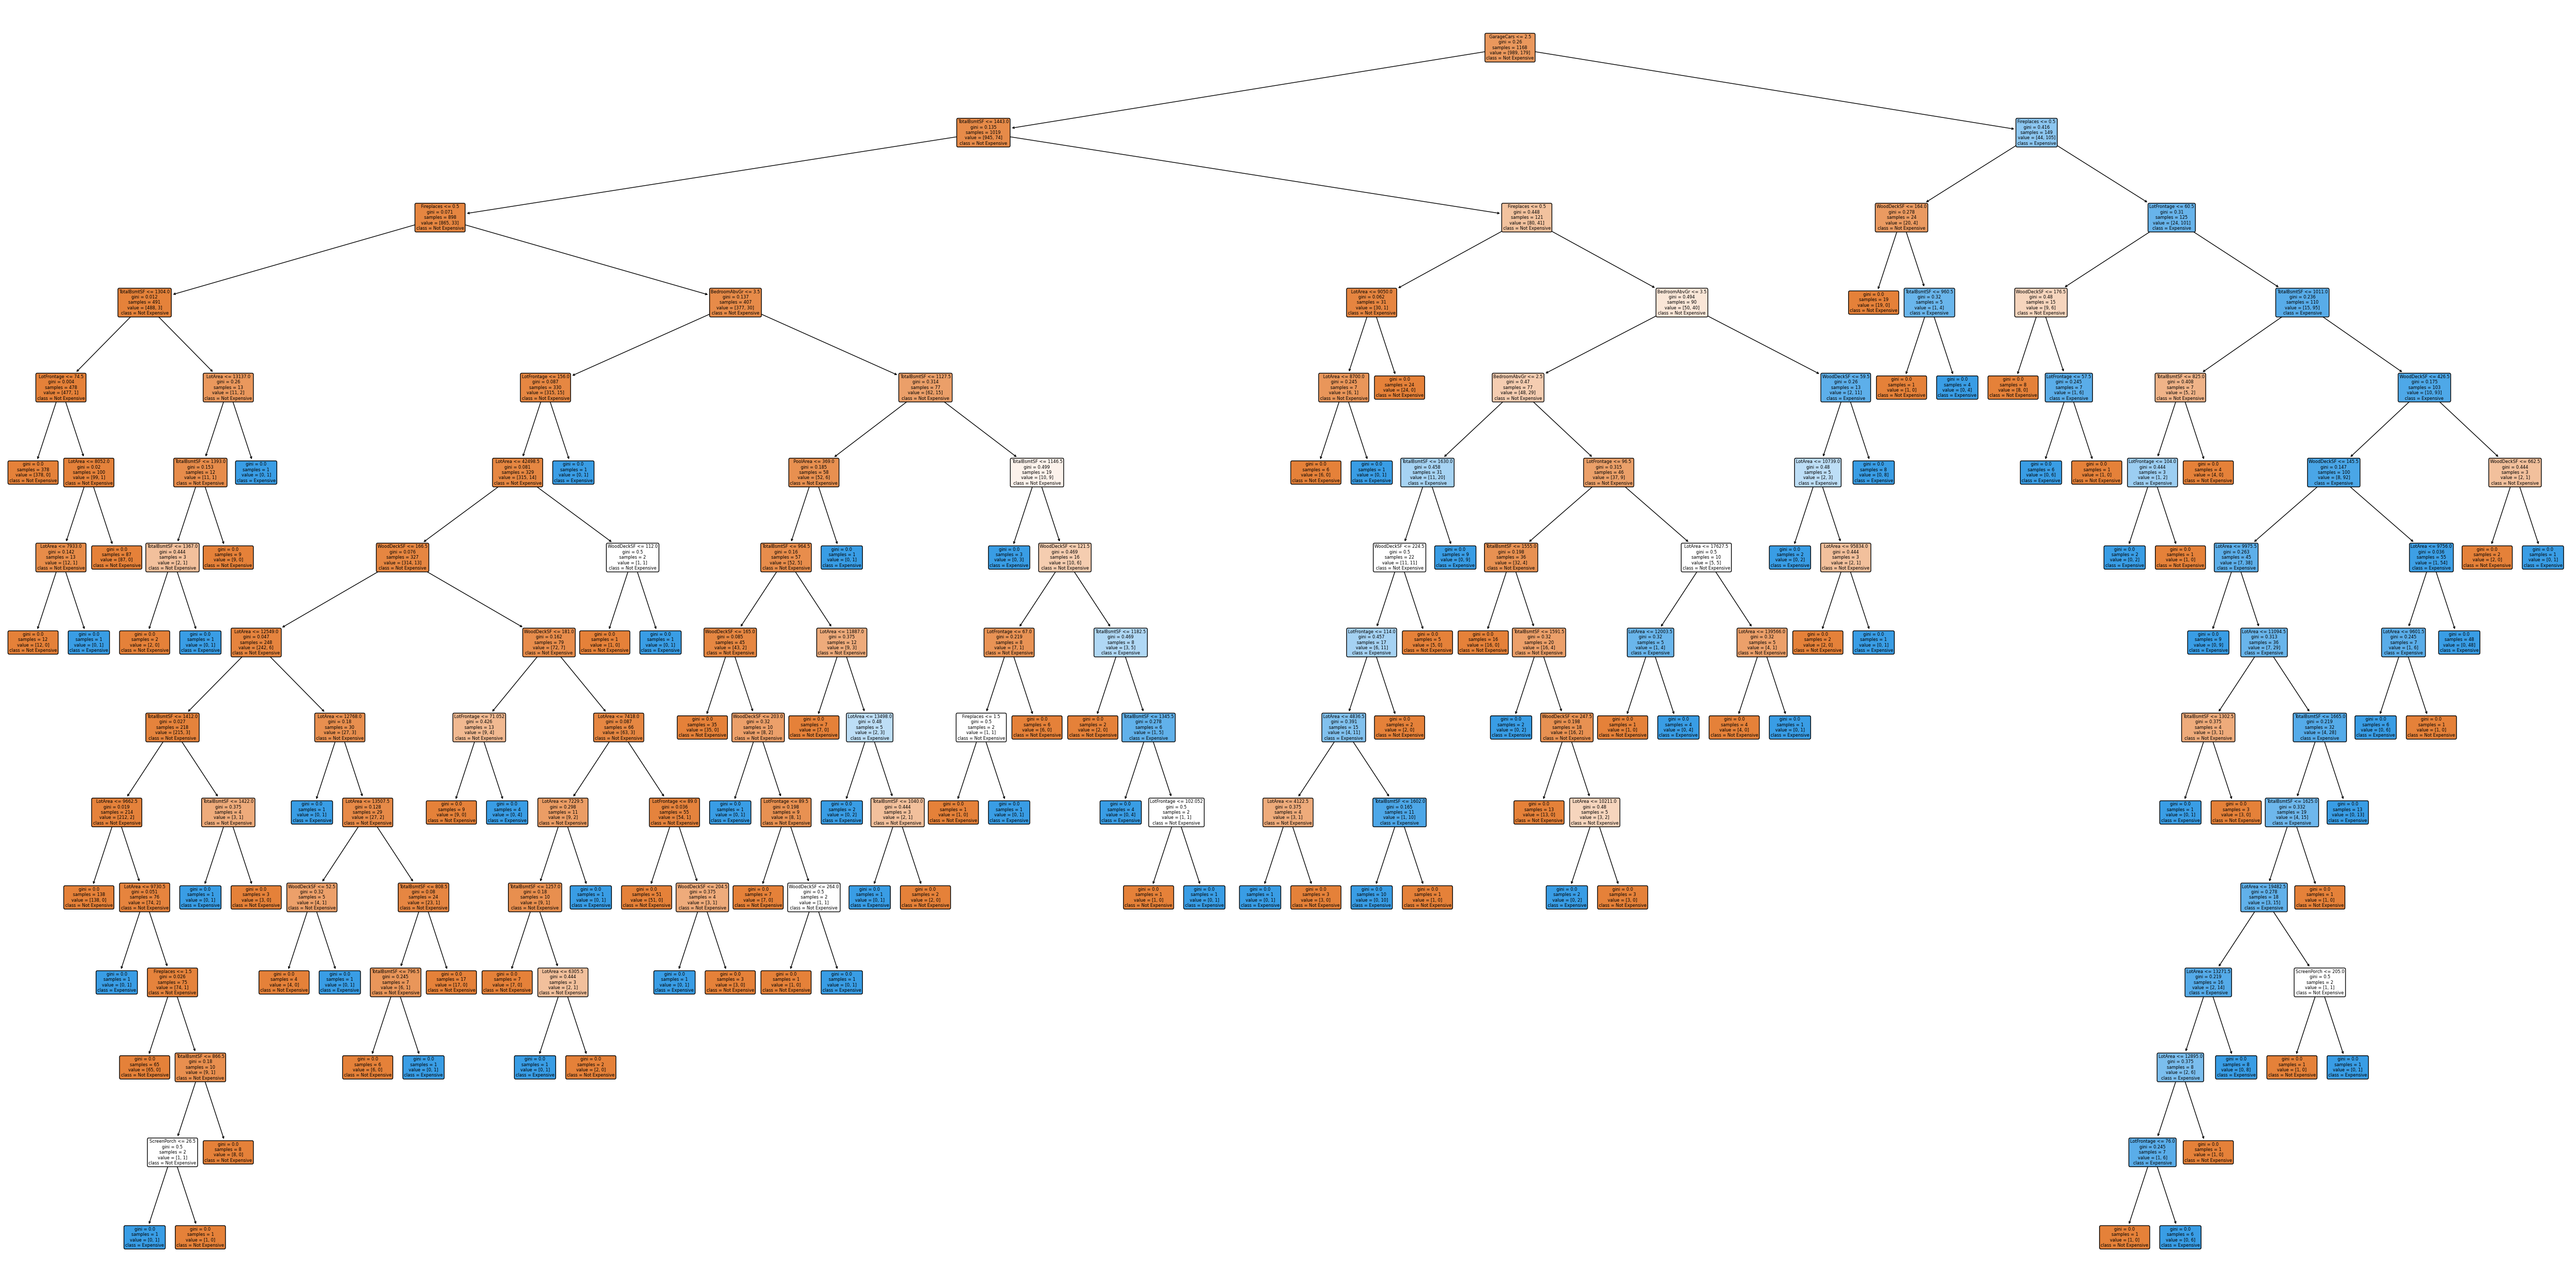

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Not Expensive','Expensive'], 
     feature_names=X.columns
     );

Our current tree is too big to distinguish what's going on. It has dozens, maybe hundreds of rules. In other words, our model is **very complex**, which is a common characteristic of models that suffer from overfitting.

To reduce the complexity (the size) of the tree and prevent overfitting, we can play with the hyperparameters of the tree. It's a process known as "pruning" the tree.

### **Exercise 1**: Pruning the tree

1. Tweak the parameters `max_depth` and `min_samples_leaf` of the decision tree, based on the Scikit-Learn documentation and the Statquest videos you watched following the Learning Platform.
2. Try to make the tree smaller.
3. Visualize again the tree.
4. Check the performance of your "small tree" on the train & test sets.

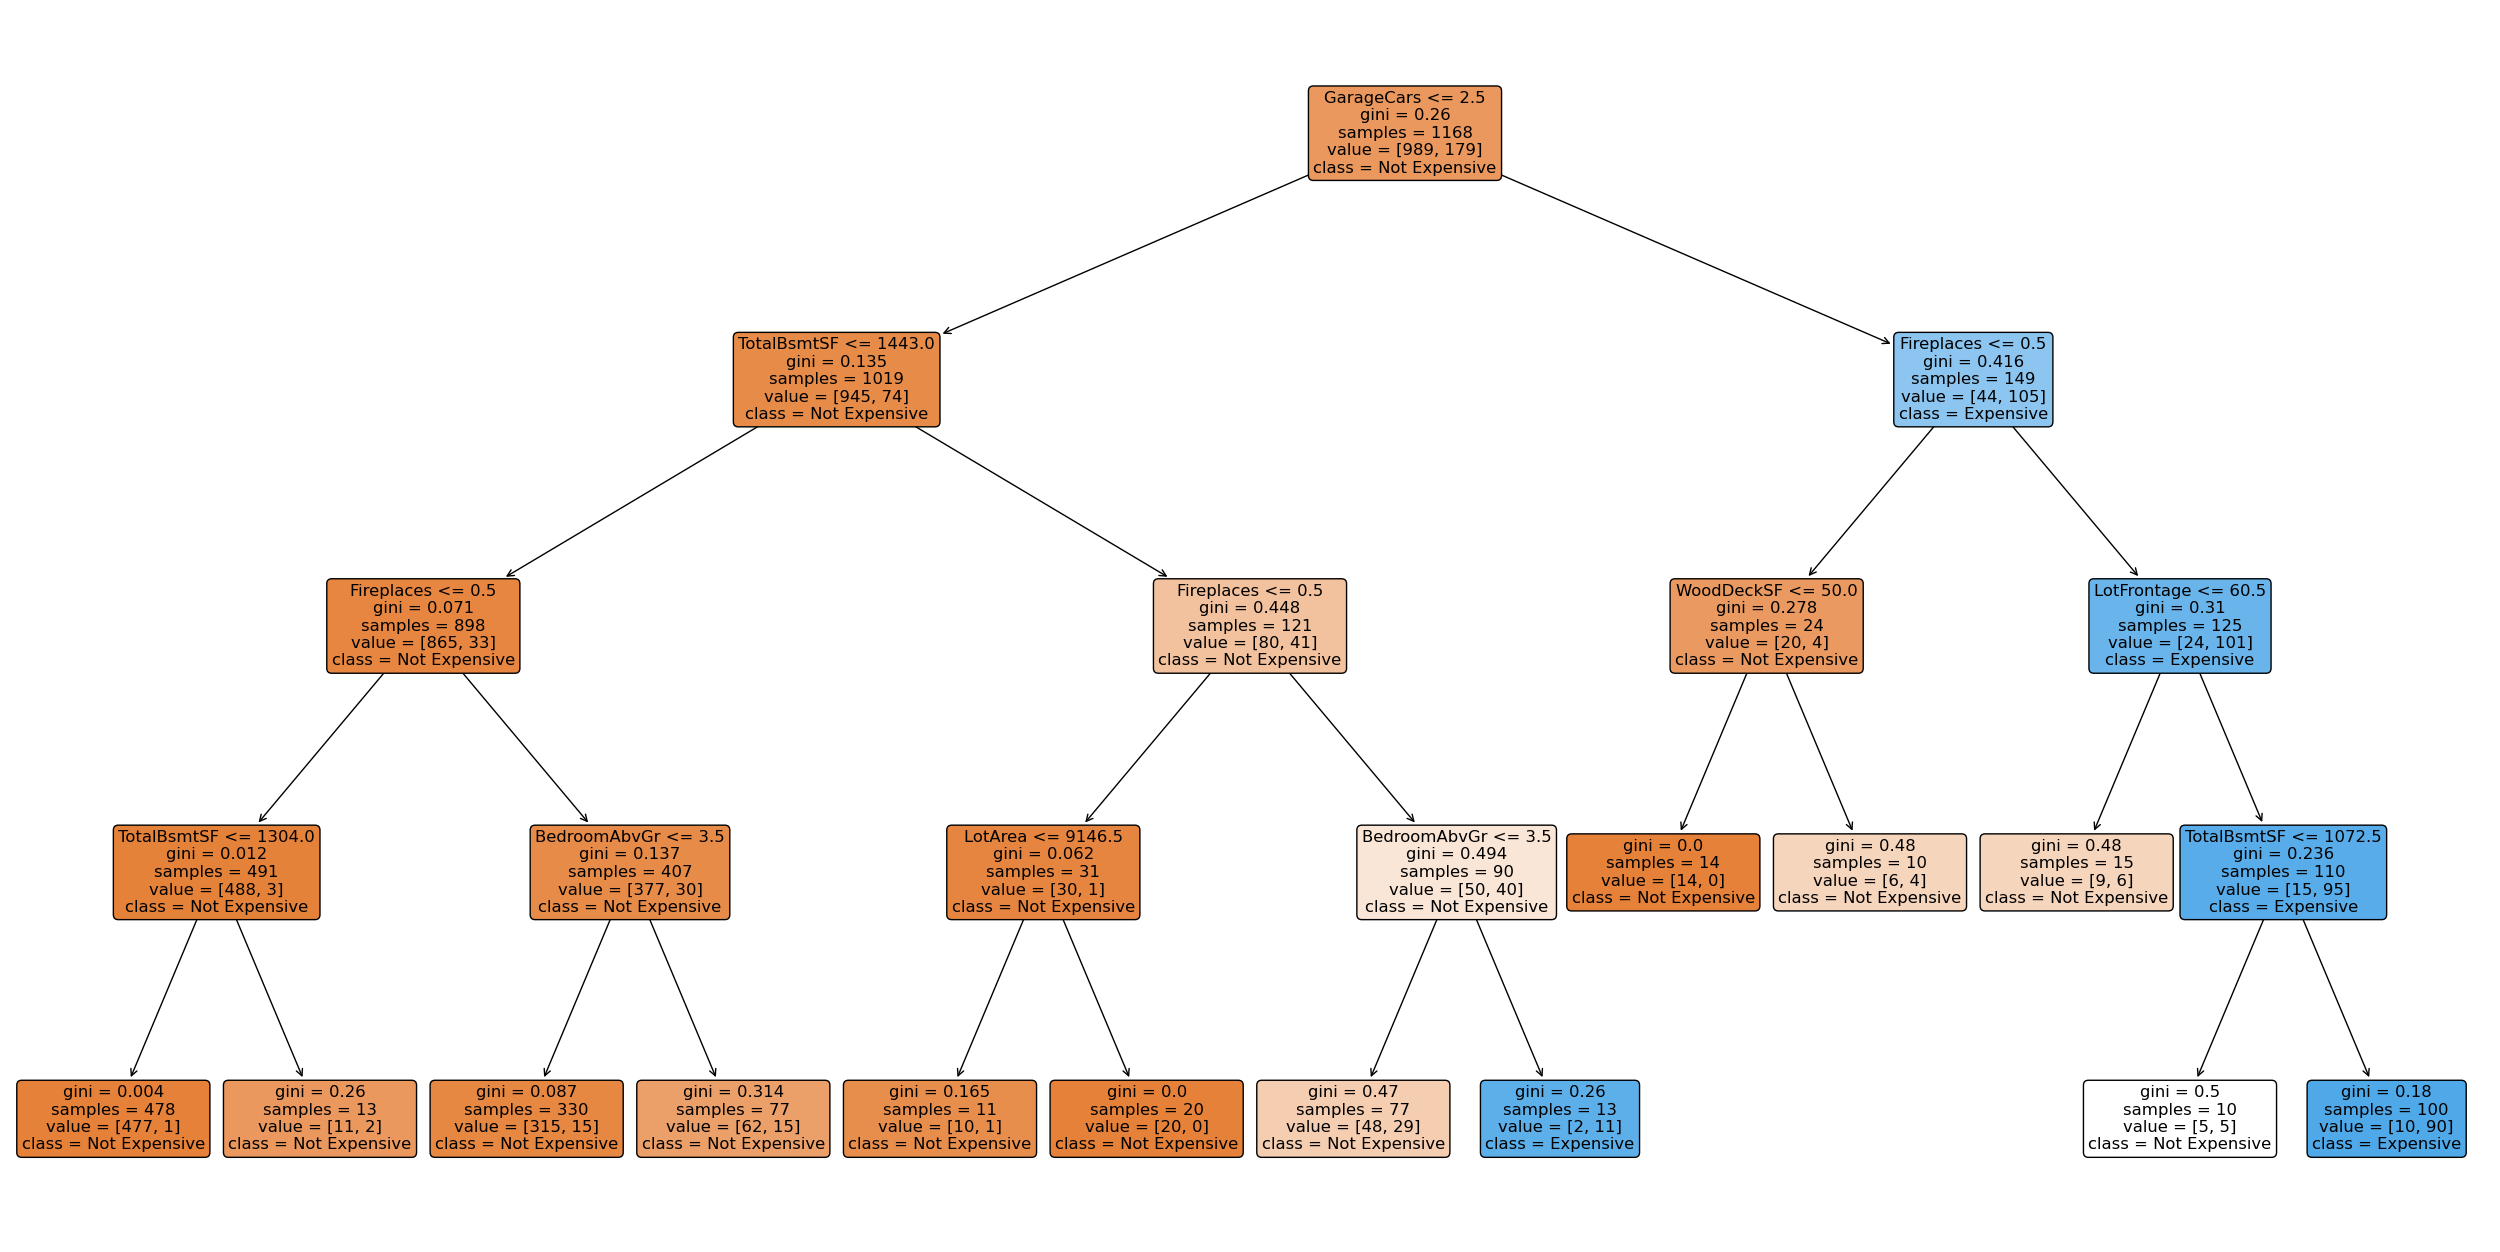

In [30]:
# your code here
# 2. initialize the model (optional: give some parameters)
my_tree_prunned = DecisionTreeClassifier(max_depth = 4,
                                         min_samples_leaf=10
                                         )

# 3. fit the model to the train data
my_tree_prunned.fit(X = X_imputed_train, 
            y = y_train)

plt.figure(figsize=(32, 16))

plot_tree(
     my_tree_prunned,
     filled=True, 
     rounded=True, 
     class_names=['Not Expensive','Expensive'], 
     feature_names=X.columns
     );

In [31]:
# make predictions on the train set
y_pred_tree_train = my_tree_prunned.predict(X_imputed_train)

In [32]:
accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )

0.922945205479452

Make predictions on the test set

In [33]:
y_pred_tree_test = my_tree_prunned.predict(X_imputed_test)

In [34]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.928082191780822